In [29]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style 
import os
import pandas as pd 
import pandas_datareader.data as web
import pickle 
import requests 
import numpy as np

In [3]:
# Loading data 
stock_data = pd.read_csv('Data/nifty50_joined_closes.csv')

In [8]:
stock_data.head(10)
stock_data.tail(10)

,Date,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,INFRATEL.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
4532,2018-01-18,416.250000,275.649994,1188.250000,645.849976,584.799988,3201.199951,1660.699951,491.809357,343.799988,...,418.950012,90.599998,716.219971,552.650024,4408.649902,800.500000,326.700012,324.291260,341.200012,595.849976
4533,2018-01-19,433.450012,268.600006,1189.900024,643.200012,590.250000,3210.399902,1701.900024,494.690643,346.049988,...,418.049988,92.199997,717.411011,552.900024,4300.000000,802.349976,331.649994,327.879547,349.350006,600.349976
4534,2018-01-22,438.049988,268.450012,1176.000000,640.799988,611.549988,3274.500000,1706.349976,487.537079,343.500000,...,421.899994,92.099998,716.648010,569.500000,4330.000000,813.599976,326.950012,320.503601,355.350006,608.849976
4535,2018-01-23,438.399994,262.700012,1169.900024,653.750000,620.099976,3295.949951,1708.699951,488.928040,339.399994,...,418.000000,92.500000,742.895996,588.250000,4374.700195,807.250000,343.500000,314.224121,359.549988,597.150024
4536,2018-01-24,448.750000,260.149994,1151.050049,658.450012,607.950012,3341.550049,1739.150024,456.538177,342.299988,...,403.600006,91.800003,726.080994,603.150024,4283.000000,824.250000,340.000000,312.928375,364.799988,603.200012
4537,2018-01-25,436.500000,263.000000,1150.449951,639.700012,616.099976,3311.699951,1710.300049,449.782013,343.450012,...,400.299988,89.949997,732.796997,598.450012,4359.950195,768.950012,345.600006,310.934875,361.600006,595.849976
4538,2018-01-26,NaN,263.000000,NaN,639.700012,616.099976,NaN,NaN,NaN,NaN,...,NaN,89.949997,NaN,598.450012,NaN,NaN,NaN,NaN,361.600006,NaN
4539,2018-01-29,436.649994,263.649994,1152.050049,635.250000,605.549988,3363.899902,1715.300049,437.760010,353.399994,...,399.250000,90.050003,746.135986,604.799988,4390.700195,788.500000,345.000000,310.137451,358.000000,608.900024
4540,2018-01-30,428.250000,261.500000,1126.699951,631.700012,593.750000,3358.300049,1678.400024,440.600006,344.450012,...,395.850006,90.599998,739.181030,602.950012,4363.200195,770.750000,341.299988,306.299988,353.350006,603.000000
4541,2018-01-31,428.850006,261.799988,1128.300049,629.549988,593.599976,3337.149902,1677.849976,439.850006,351.549988,...,399.500000,89.000000,705.049988,612.650024,4382.000000,752.049988,340.350006,304.700012,354.399994,593.700012


In [6]:
stock_data.describe()

,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,INFRATEL.NS,BOSCHLTD.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
count,2506.000000,3857.000000,3854.000000,4480.000000,4420.000000,761.000000,3853.000000,3855.000000,1256.000000,3847.000000,...,4480.000000,4478.000000,4478.000000,2817.000000,3317.000000,3815.000000,4468.000000,4478.000000,3094.000000,3854.000000
mean,190.687339,123.944831,312.473113,167.344397,219.206593,2644.118135,216.668701,275.912402,294.953490,8081.829053,...,172.458139,49.287167,280.569558,293.597218,1611.648758,217.274365,106.605382,133.967052,83.229688,176.970259
std,94.101528,76.904296,370.066418,261.085171,294.179459,328.089370,420.813812,129.388039,95.538576,7508.282645,...,171.407164,36.993731,171.705869,165.034443,1178.167285,213.295965,104.972534,86.806176,90.098457,156.540842
min,46.444466,9.911827,1.606950,1.627159,0.883451,1948.650024,0.047599,9.939185,117.969635,261.918121,...,4.026823,0.109094,20.967003,43.799164,240.556931,14.982855,-0.000670,15.860403,5.530055,15.399932
25%,124.534905,61.738316,20.347583,14.389281,13.822837,2403.899902,5.863996,183.431862,184.380585,2700.853638,...,32.224920,8.462828,141.532620,153.035507,729.524719,98.576977,0.115913,54.458535,21.463859,47.989895
50%,148.010033,111.970703,131.058632,35.261764,104.855617,2633.149902,18.939331,316.027557,336.619934,4735.540527,...,90.531349,62.698853,295.146271,222.733292,1066.149414,136.998810,92.059601,114.155556,44.785267,118.471160
75%,267.505882,189.937393,493.216675,106.566362,343.341416,2852.149902,135.984741,363.852661,368.438156,9604.837891,...,299.367126,82.289123,394.144455,448.025757,2549.912109,194.535340,175.555516,194.073624,122.002424,266.662399
max,448.750000,288.799988,1253.534668,880.422668,1943.327881,3369.000000,1963.199951,539.698669,479.200012,27263.712891,...,597.891846,112.112633,746.468994,696.745850,4545.100098,894.099976,402.433685,330.869781,377.049988,613.400024


In [12]:
stock_data.fillna(method = 'bfill', inplace = True)

In [13]:
stock_data.head(10)

,Date,ADANIPORTS.NS,AMBUJACEM.NS,ASIANPAINT.NS,AUROPHARMA.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BHARTIARTL.NS,INFRATEL.NS,...,TATAMOTORS.NS,TATAPOWER.NS,TATASTEEL.NS,TECHM.NS,ULTRACEMCO.NS,UPL.NS,VEDL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS
0,2000-01-03,170.43573,12.664731,1.60695,9.782014,0.977836,2451.75,0.063393,16.669088,169.697723,...,13.432799,0.131650,41.849663,106.283348,244.934128,25.304375,0.000062,52.416237,8.089035,30.817329
1,2000-01-04,170.43573,12.664731,1.60695,10.494377,1.015591,2451.75,0.063393,16.669088,169.697723,...,12.902939,0.131907,41.396713,106.283348,244.934128,25.304375,0.000061,56.609615,8.089035,30.817329
2,2000-01-05,170.43573,12.664731,1.60695,11.054511,0.989163,2451.75,0.063393,16.669088,169.697723,...,13.215897,0.134480,42.975147,106.283348,244.934128,25.304375,0.000061,57.532425,8.089035,30.817329
3,2000-01-06,170.43573,12.664731,1.60695,11.557423,0.964623,2451.75,0.063393,16.669088,169.697723,...,13.764386,0.138683,46.186974,106.283348,244.934128,25.304375,0.000064,56.419514,8.089035,30.817329
4,2000-01-07,170.43573,12.664731,1.60695,11.538349,0.917430,2451.75,0.063393,16.669088,169.697723,...,14.867508,0.138425,47.202644,106.283348,244.934128,25.304375,0.000062,51.906364,8.089035,30.817329
5,2000-01-10,170.43573,12.664731,1.60695,10.673019,0.945745,2451.75,0.063393,16.669088,169.697723,...,16.041916,0.148117,50.030022,106.283348,244.934128,25.304375,0.000064,51.976768,8.089035,30.817329
6,2000-01-11,170.43573,12.664731,1.60695,9.820893,0.898553,2451.75,0.063393,16.669088,169.697723,...,14.759042,0.141084,46.035988,106.283348,244.934128,25.304375,0.000061,47.822269,8.089035,30.817329
7,2000-01-12,170.43573,12.664731,1.60695,10.277952,0.902328,2451.75,0.063393,16.669088,169.697723,...,14.889181,0.143314,45.377148,106.283348,244.934128,25.304375,0.000062,49.312683,8.089035,30.817329
8,2000-01-13,170.43573,12.664731,1.60695,9.541011,0.891002,2451.75,0.063393,16.669088,169.697723,...,14.591714,0.139626,43.702637,106.283348,244.934128,25.304375,0.000062,47.722221,8.089035,30.817329
9,2000-01-14,170.43573,12.664731,1.60695,9.586127,0.883451,2451.75,0.063393,16.669088,169.697723,...,14.814828,0.138854,43.565338,106.283348,244.934128,25.304375,0.000061,48.061234,8.089035,30.817329


In [14]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 52 columns):
Date             4542 non-null object
ADANIPORTS.NS    4542 non-null float64
AMBUJACEM.NS     4542 non-null float64
ASIANPAINT.NS    4542 non-null float64
AUROPHARMA.NS    4542 non-null float64
AXISBANK.NS      4542 non-null float64
BAJAJ-AUTO.NS    4542 non-null float64
BAJFINANCE.NS    4542 non-null float64
BHARTIARTL.NS    4542 non-null float64
INFRATEL.NS      4542 non-null float64
BOSCHLTD.NS      4542 non-null float64
BPCL.NS          4542 non-null float64
CIPLA.NS         4542 non-null float64
COALINDIA.NS     4542 non-null float64
DRREDDY.NS       4542 non-null float64
EICHERMOT.NS     4542 non-null float64
GAIL.NS          4542 non-null float64
HCLTECH.NS       4542 non-null float64
HDFC.NS          4542 non-null float64
HDFCBANK.NS      4542 non-null float64
HEROMOTOCO.NS    4542 non-null float64
HINDALCO.NS      4542 non-null float64
HINDUNILVR.NS    4542 non-null float

## Visualizing Data : 

In [47]:
def visualize_data():
    
    df = pd.read_csv('Data/nifty50_joined_closes.csv')
    df_corr = df.corr()
    
    data = df_corr.values 
    fig = plt.figure(figsize = (20, 20))
    ax = fig.add_subplot(1, 1, 1)
    
    heatmap = ax.pcolor(data, cmap = plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5, minor = False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5, minor = False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation = 90)
    heatmap.set_clim(-1, 1)
    plt.tight_layout()
    plt.show()
    
    #fig.savefig('Figures/Fig3_Nifty50_Closes_Heatmap.png')

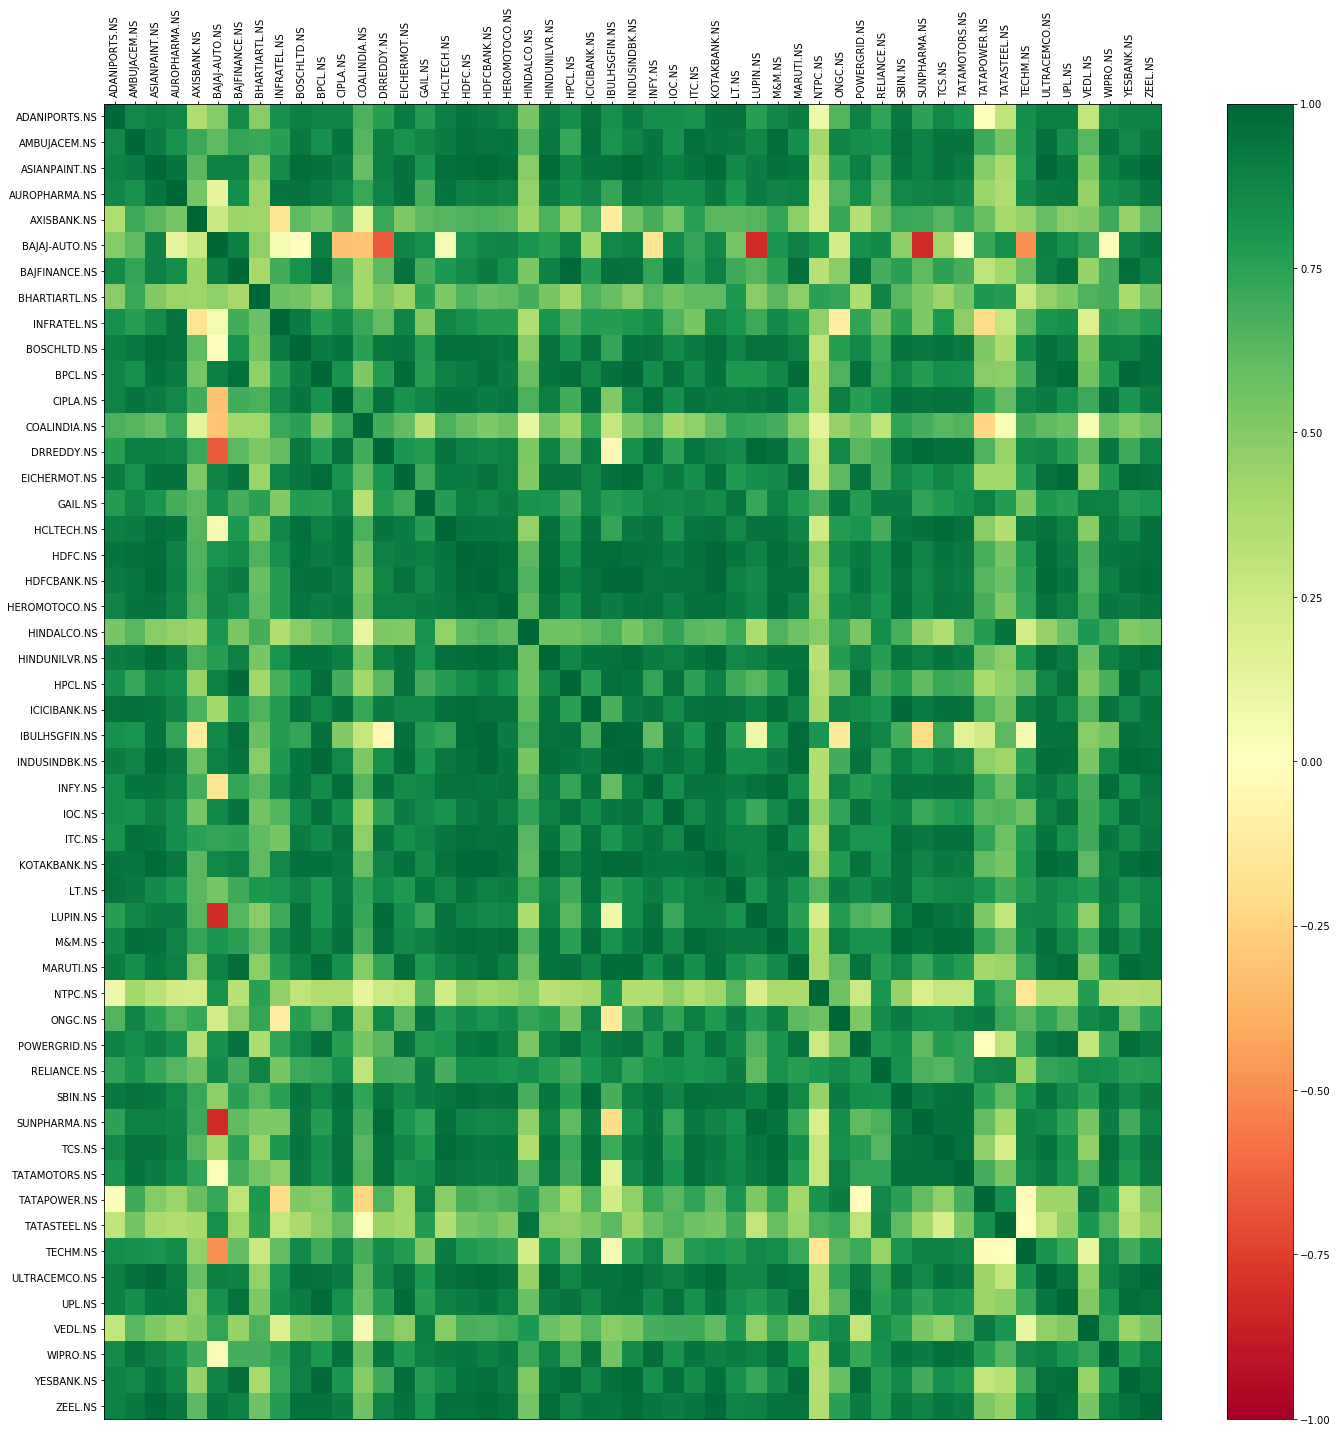

In [48]:
visualize_data()

## Buy Sell Hold Prediction 

In [49]:
# Compiling Data 

In [61]:
from preprocessing import *

In [68]:
do_ml('RELIANCE.NS')

Data spread :  Counter({'1': 1881, '-1': 1692, '0': 969})
Accuracy :  0.391071428571
Predicted spread:  Counter({-1: 722, 1: 351, 0: 47})


0.39107142857142857